# Important!

## To use this notebook, you have to create a file from the logs of an EE node.

The command to dump all the memory logs in a file is:

`journalctl -u docker.0xai_ee.service -a -S "YYYY-MM-DD" | grep "Memory" -A 12 > debug_memory_##node_name##`

Example:

(Get all the memory logs from rolcar1, starting from 16th of January, 2024)

`journalctl -u docker.0xai_ee.service -a -S "2024-01-16" | grep "Memory" -A 12 > debug_memory_rolcar1`

In [193]:
import matplotlib.pyplot as plt

In [194]:
def process_shard(shard):
  new_shard = []
  for line in shard:
    if not 'rolcar-1 sh[' in line:
      new_shard.append(line)
  return new_shard
def path_to_shards(path):
  with open(path, "r") as fd:
    raw_lines = fd.readlines()
  raw_lines = [line for line in raw_lines if "docker" not in line]
  raw_data = "".join(raw_lines)
  shards = raw_data.split("[EE]")[1:]
  shards = [shard.split("\n") for shard in shards]
  shards = [process_shard(shard) for shard in shards]
  
  return shards


In [195]:
paths = [
  r'C:\debug\debug_memory_rolcar1',
  r'C:\debug\debug_memory_bt3',
  r'C:\debug\debug_memory_bt5',
]

shards_dict = {
    path.split("_")[-1]: path_to_shards(path)
    for path in paths
}

In [196]:
shards_dict['rolcar1'][0]

["[24-03-19 00:00:25][AMON] Memory status for 'rolcar-1' v.3.29.480/Lv.9.8.107 (aa/ap: 0/False):",
 '===========================================================================================',
 '===========================================================================================',
 '                       Status: OK (4120 readings)',
 '                       Global mem status/increase:',
 '                         Avail / Total             :  20.09 /  31.13 (GB)',
 '                         Avail Start / Last decr.  :  26.92 /   0.03 (GB)',
 '                         Out-of-process mem loss   :   3.27 (GB)',
 '                        -------------------------------------------------------------',
 '                       Process memory status and increase:',
 '                         Start / Now               :   1.00 /   4.56 (GB)',
 '                         Inc / Last Inc / Mean Inc :   3.56 /   0.00 /   0.00 (GB)',
 '=======================================================

In [197]:
shards_dict['bt5'][0]

["[24-03-19 00:00:18][AMON] Memory status for 'BT5' v.3.29.480/Lv.9.8.107 (aa/ap: 0/False):",
 '===========================================================================================',
 '===========================================================================================',
 '                       Status: OK (4340 readings)',
 '                       Global mem status/increase:',
 '                         Avail / Total             :  28.35 /  31.02 (GB)',
 '                         Avail Start / Last decr.  :  28.73 /   0.00 (GB)',
 '                         Out-of-process mem loss   :   0.05 (GB)',
 '                        -------------------------------------------------------------',
 '                       Process memory status and increase:',
 '                         Start / Now               :   0.57 /   0.91 (GB)',
 '                         Inc / Last Inc / Mean Inc :   0.34 /   0.00 /   0.00 (GB)',
 '============================================================

In [198]:
def plot_shards(shards, node):
  from datetime import datetime
  times = [shard[0][1:18] for shard in shards]
  
  # time looks like this: 18-02-28 22:01:09
  times = [datetime.strptime(time, "%y-%m-%d %H:%M:%S") for time in times]
  
  
  available_mem = [float(shard[5][52:60]) for shard in shards]
  oop_mem = [float(shard[7][52:60]) for shard in shards]
  proc_mem = [float(shard[10][61:69]) for shard in shards]
  
  plt.figure(figsize=(12, 6))  # Increase the figure size
  plt.plot(times, available_mem)
  plt.xlabel('Time')
  plt.ylabel('Available Memory')
  
  plt.title('Available Memory over Time for ' + node)
  plt.xticks(rotation=45)  # Rotate the tick labels
  plt.show()
  
  plt.figure(figsize=(12, 6))  # Increase the figure size
  plt.plot(times, oop_mem)
  plt.xlabel('Time')
  plt.ylabel('Out of process Memory')
  
  plt.title('Out of process Memory over Time for ' + node)
  plt.xticks(rotation=45)  # Rotate the tick labels
  plt.show()
  
  plt.figure(figsize=(12, 6))  # Increase the figure size

  plt.plot(times, proc_mem)
  plt.xlabel('Time')
  plt.ylabel('Process Memory')
  
  plt.title('Process Memory over Time for ' + node)
  plt.xticks(rotation=45)
  plt.show()


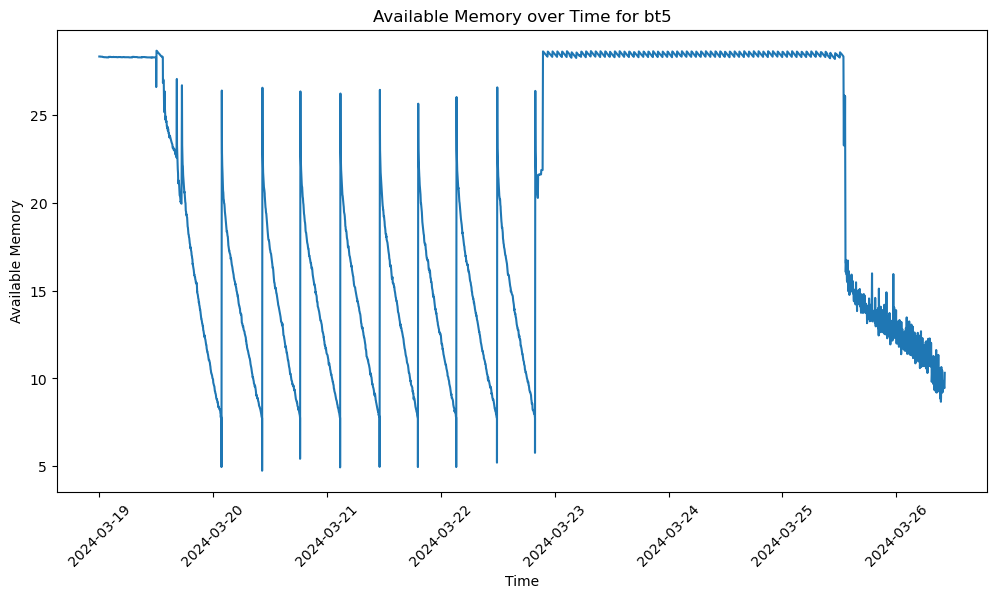

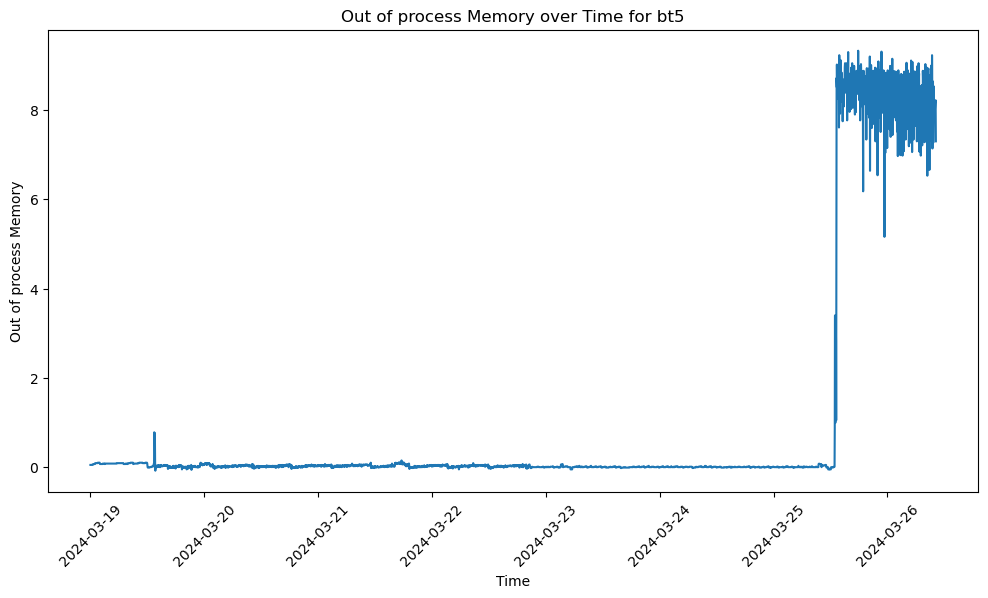

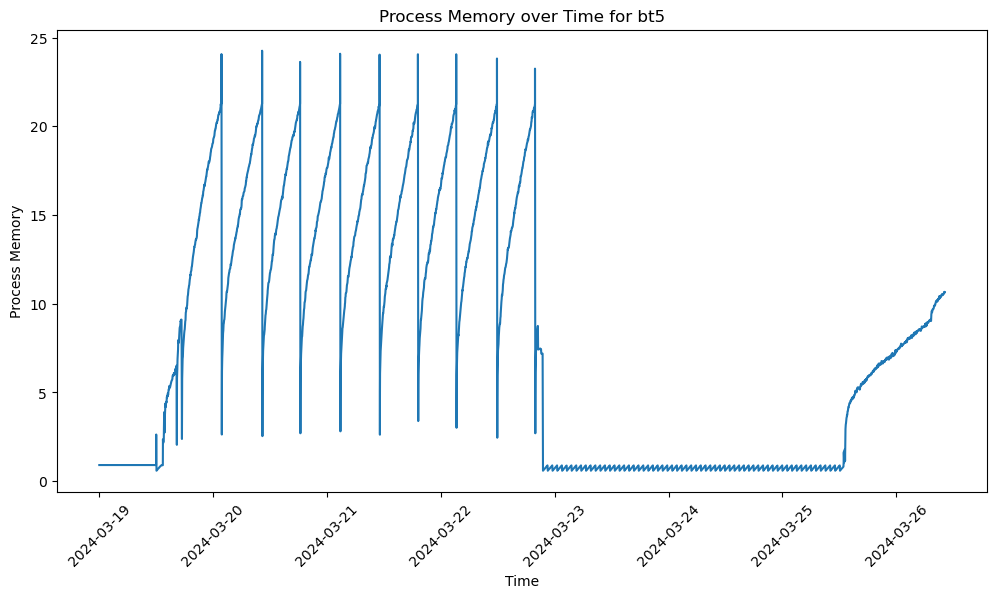

In [199]:
plot_shards(shards_dict['bt5'], 'bt5')

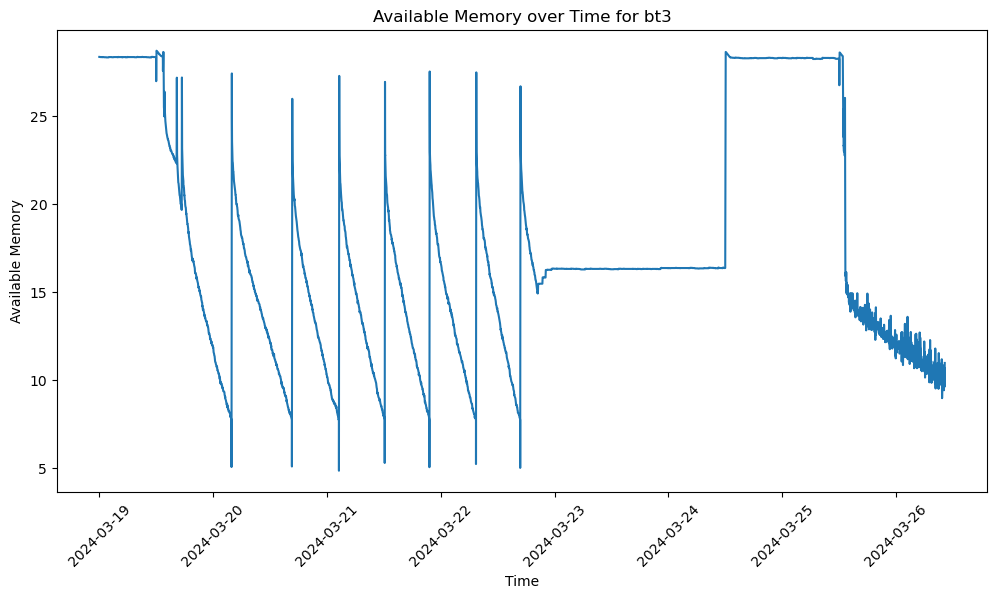

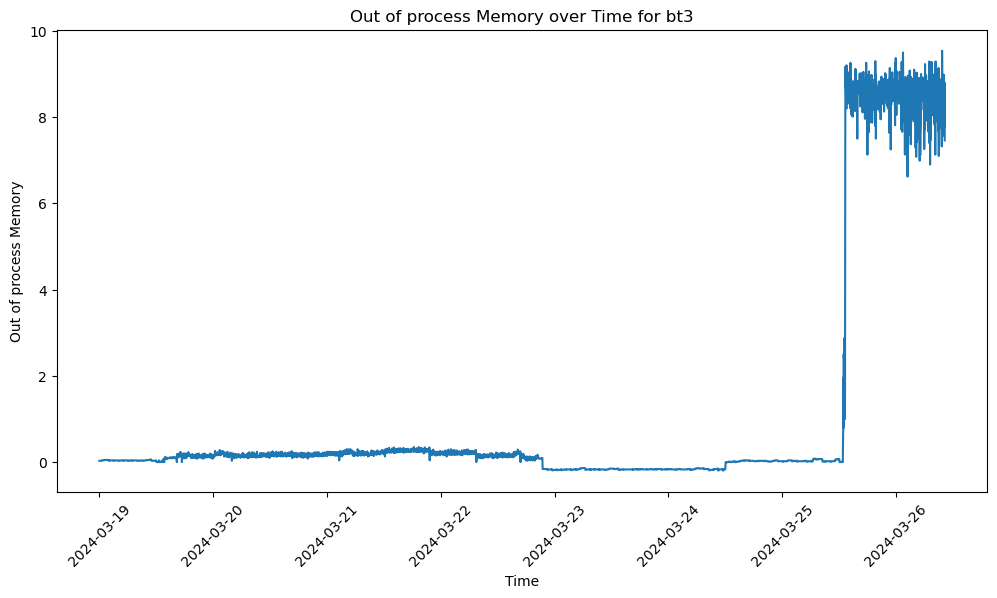

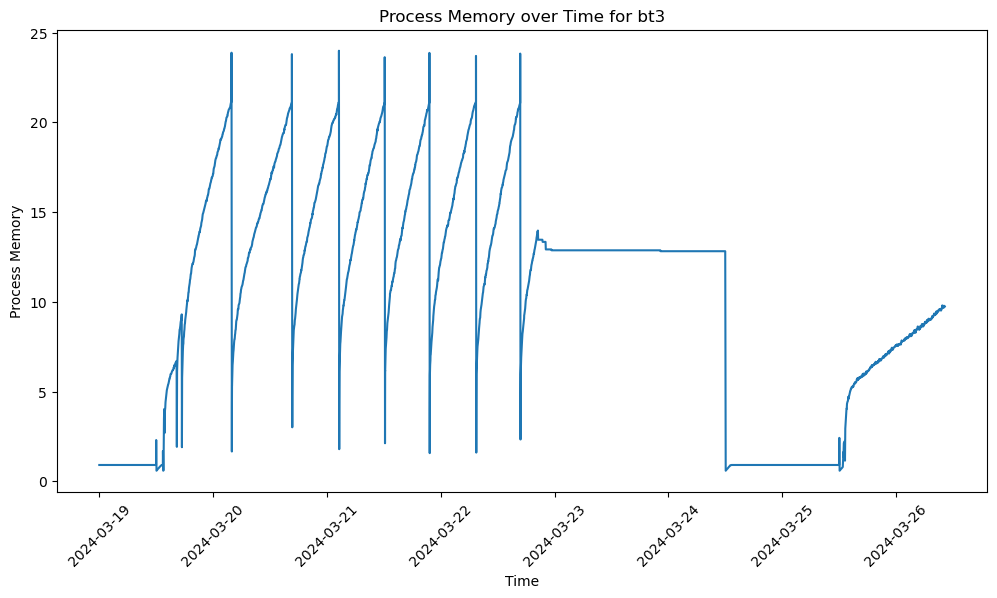

In [200]:
plot_shards(shards_dict['bt3'], 'bt3')

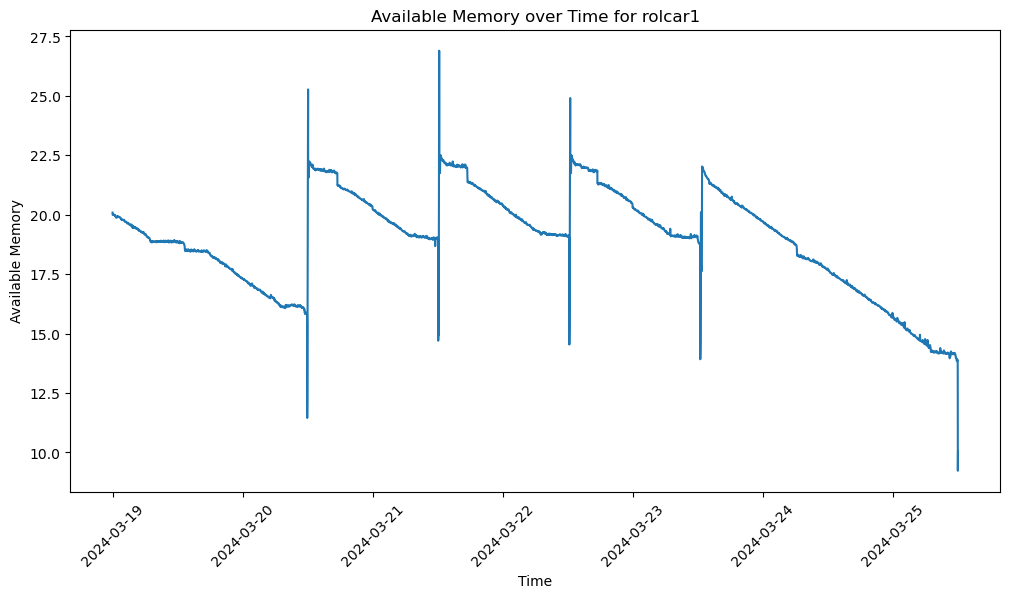

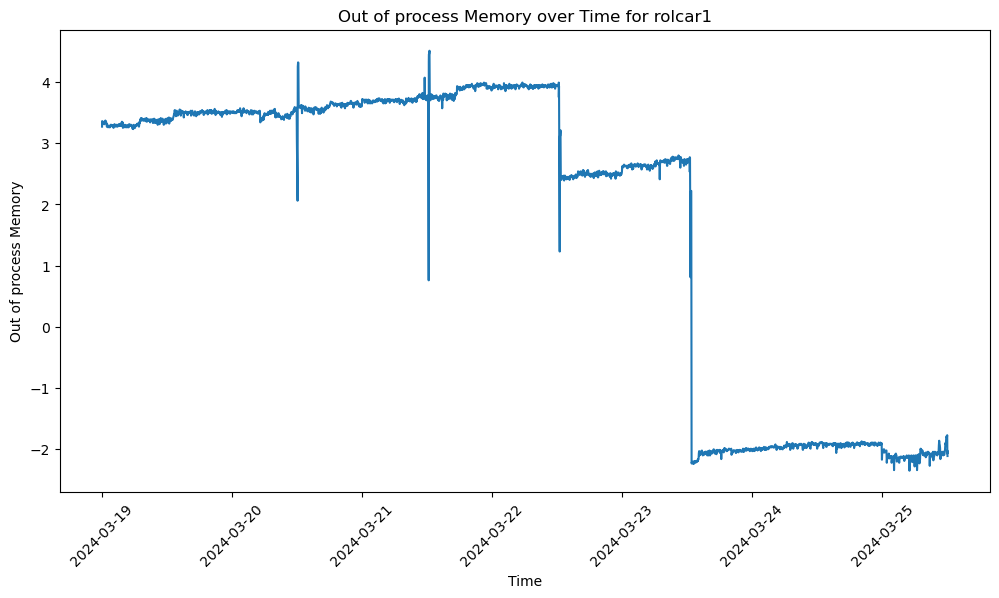

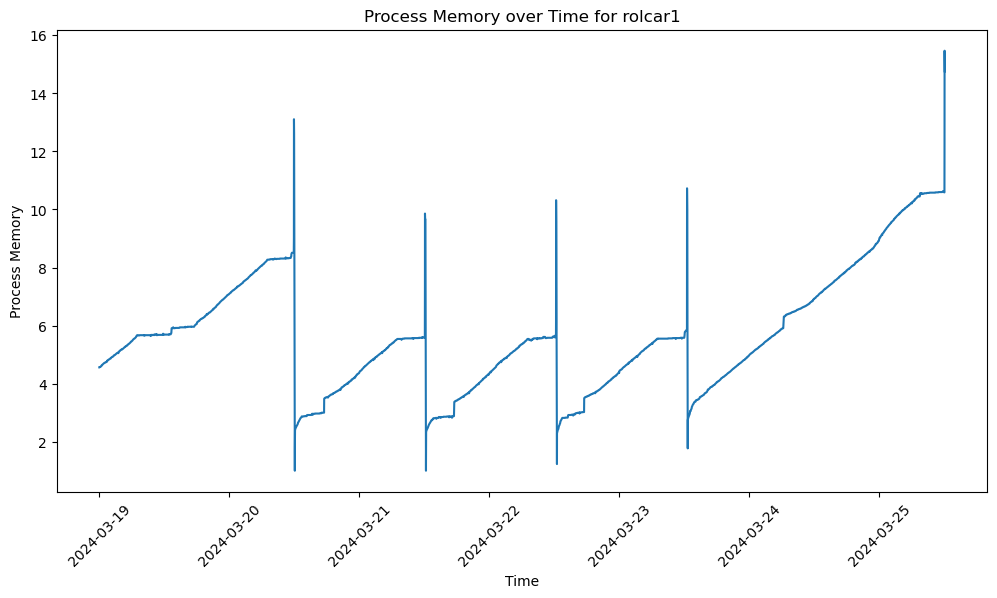

In [201]:
plot_shards(shards_dict['rolcar1'], 'rolcar1')